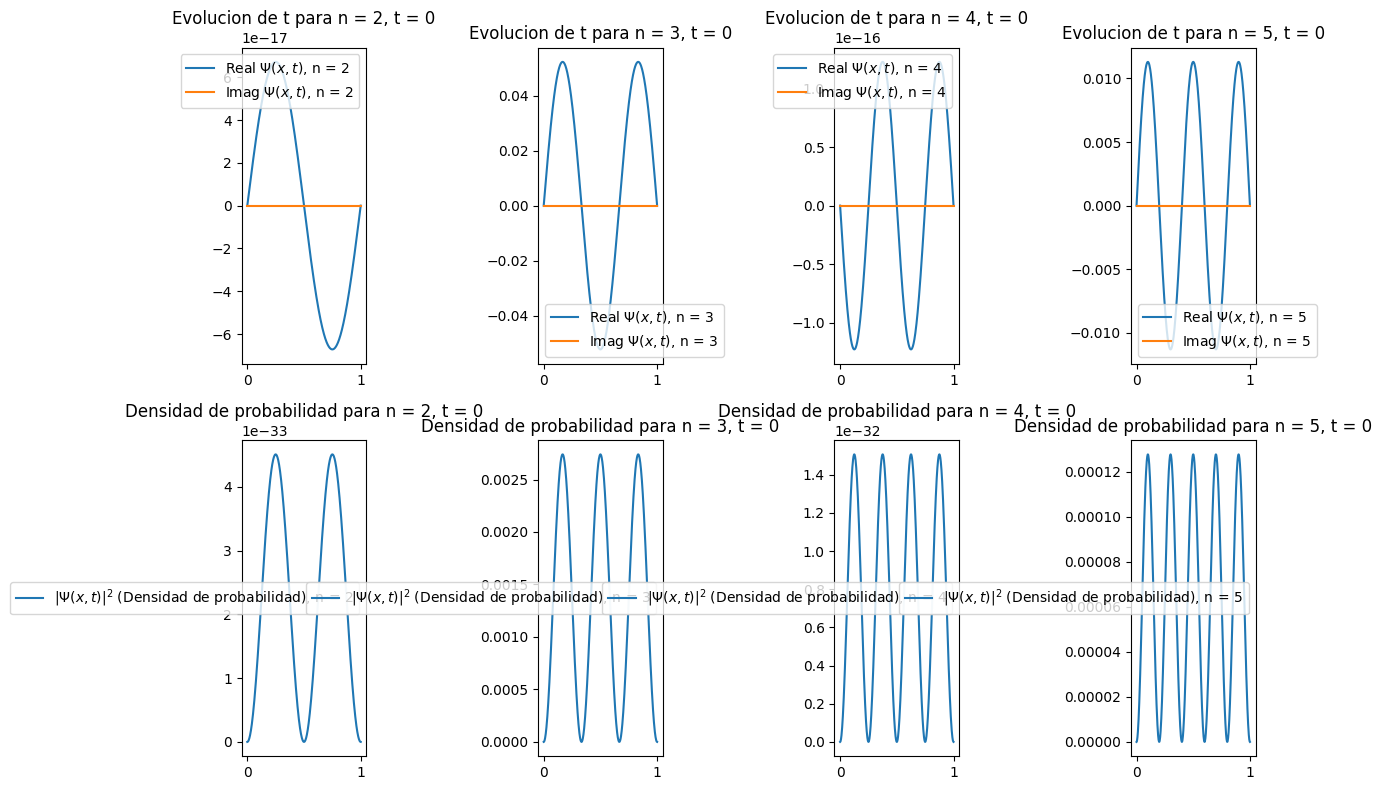

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

a = 1.0
t = 0
n_v = [2, 3, 4, 5]

def cn_integral(n):
    A = np.sqrt(30 / a**5)
    integrand = lambda x: A * x * (a - x) * np.sqrt(2 / a) * np.sin(n * np.pi * x / a)
    result, _ = quad(integrand, 0, a)
    return result

def Psi(x, t, n):
    En = (n**2 * np.pi**2 * (1 / (2 * a**2)))
    cn = cn_integral(n)
    psi_nx = np.sqrt(2 / a) * np.sin(n * np.pi * x / a)
    return cn * psi_nx * np.exp(-1j * En * t)
def densidad_proba(Psi):
    return np.abs(Psi)**2
x_values = np.linspace(0, a, 500)

plt.figure(figsize=(12, 8))
for n in n_v:
    Psi_v= Psi(x_values, t, n)
    prob_density = densidad_proba(Psi_v)
    plt.subplot(2, len(n_v), n - 1)
    plt.plot(x_values, np.real(Psi_v), label=f'Real $\Psi(x, t)$, n = {n}')
    plt.plot(x_values, np.imag(Psi_v), label=f'Imag $\Psi(x, t)$, n = {n}')
    plt.title(f'Evolucion de t para n = {n}, t = {t}')
    plt.legend()
    plt.subplot(2, len(n_v), n + len(n_v) - 1)
    plt.plot(x_values, prob_density, label=f'$|\Psi(x, t)|^2$ (Densidad de probabilidad), n = {n}')
    plt.title(f'Densidad de probabilidad para n = {n}, t = {t}')
    plt.legend()

plt.tight_layout()
plt.show()